In [1]:
import numpy as np
from sys import getsizeof
import time
import copy
import matplotlib.pyplot as plt

In [16]:
def Median(M):

  median_index=len(M)//2
  
  return median_index

In [3]:
M= [np.array([39, 39, 13]), np.array([12, 11, 16])]
M

[array([39, 39, 13]), array([12, 11, 16])]

In [4]:
M= [np.array([39, 39, 13]), np.array([12, 11, 16])]
M

[array([39, 39, 13]), array([12, 11, 16])]

In [5]:
np.array(M)

array([[39, 39, 13],
       [12, 11, 16]])

In [34]:
def Partition(M,dimension,pivot):
  # 0-th dim, 1-th dim
  print("파티션에 dimension=2넣으니까 dimension-1째 방(",dimension-1,"번쨰 방)으로 나눈다")
  M=np.array(M)

  M=M[np.argsort(M[:,dimension-1])] 
  print("M을 위의 dimension으로 쏠팅하니까 ",M,"이렇게 나오고.")
  P1= M[:pivot]
  P2= M[pivot:]
  print("p1,p2뽑으면")
  print("P1",P1)
  print("P2",P2)
  return P1,P2

In [107]:
def SkylineBasic(M, dimension):
    start_time = time.time()    
    print("input data M=")
    print(M)
    if len(M) == 1:
      return M
    else:
      pivot= Median(M)
      P1,P2 = Partition(M,dimension,pivot)
      print("p1,p2 나눈거 출력 해봤고.")
      s1=SkylineBasic(P1,dimension)
      s2=SkylineBasic(P2,dimension)
      
      R = MergeBasic(s1,s2,dimension)
      print("mergebasic결과 R=", R)
      print("")
      
      if len(R) != 0:
        '''
        for q in R:
          for p in s1:
            if dominate(q,p)==False:
              s1=[]
        '''
        print('extend 전에')
        print("s1",s1)
        print("R",R)  
        
        s1 = np.concatenate([s1,R], axis=0)

      cost_time = time.time() - start_time
      print("s1과 R 합치니까 나온 최종결과",s1)
      print("@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@")
    
      return s1 #중복된거 나중에 빼야징
      
    '''
    aaa=s1+MergeBasic(s1,s2,dimension)
    new_new = []
    for v in aaa:
      if v not in new_new:
        new_new.append(v)
    aaa=new_new 
    '''
      


In [105]:
def dominate (p, q):
  '''
  args:
    p: 이미 젤 쎈거 알고 있음
    q: p보다 약한지 아닌지 알아볼거
  return:
    True: q가 dominate 안됨 (p로부터)
    False: q는 쓰잘데기 없음
  '''
  assert len(p) == len(q)
  print('dominate function:')

  for i in range(len(q)):
    if p[i] > q[i]: 
      print("q는 dominate 안됨")
      return True  #q가 dominate 안됨
    else:
      print("q는 dominate 됨")
  return False 

In [106]:
def Minimum(M,dimension):
  print("s1의 Min을 계산할건데, dimension-2번쨰 방의 min을 계산하는거임")
  dim_array=[]
  for i in range(len(M)):
    dim_array.append(M[i][dimension-1])
  print("dimension-2번째 방의 값들은",dim_array)
  dim_minimum=min(dim_array)
  
  return dim_minimum
  

In [75]:
def MergeBasic(s1,s2,dimension):
  print("*******************MergeBasic: 시작*******************")
  print("s1",s1)
  print("s2",s2)
  R=[]

  if len(s1)==1:
    print("if s1이 1개 일때")
    p = s1[0]
    for q in s2:
      if dominate(p,q): # p가 q를 dominate 하지않는경우
        print("q가 p한테 dominate 되지 않으면,")
        R.append(q)# p에 dominate 되지않는 s2의 q를 R에 넣는다  
        print("s1=p 일떄 q가 p에 dominate 되지 않아서 q를 R에 추가함.추가한 R은 ",R)
    


  # elif S2 한개짜리 일 때 구현 안함  
  elif dimension==2:
    print("s1의 길이가 1에 걸리지 않고, dimension=2일떄로 왔어.")
    if len(s1) !=0:
      Min = Minimum(s1,dimension-1)
      print("Min=",Min)
      for q in s2:
        if q[dimension-2]<Min:
          print("s2의 q중에서 Min 보다 작은게 있다면 R에 추가시킬거야.")
          R.append(q)
          print("추가된 R은",R)  


  else:
    print('else로 갔음')
    pivot=Median(s1)
    s11,s12=Partition(s1,dimension-1,pivot)
    pivot2=Median(s2)
    s21,s22=Partition(s2,dimension-1,pivot2) 
    
    #s11= SkylineBasic(P11,dimension-1)
    #s12= SkylineBasic(P12,dimension-1)
    #s21= SkylineBasic(P21,dimension-1)
    #s22= SkylineBasic(P22,dimension-1)

    print("s11",s11)
    print("s12",s12)
    print("s22",s22)
    R1=MergeBasic(s11,s21,dimension)
    print("R1",R1)
    R2=MergeBasic(s12,s22,dimension)
    print("R2",R2)
    R3=MergeBasic(R1,R2,dimension-1)
    print("R3",R3)
    print("R1이랑 R2랑 합친게 위에라고?")
    print("R1",R1)
    print("R3",R3)
    R=R1+R3
    print("R",R)

    
    print("else일때",R)
  print("R",R)
  print("*******************MergeBasic: 끝*******************")
  
  
  return R  

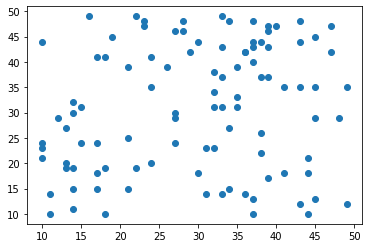

array([[15, 31],
       [43, 48],
       [18, 19],
       [37, 10],
       [17, 15],
       [44, 21],
       [43, 35],
       [49, 12],
       [29, 42],
       [40, 47],
       [16, 49],
       [13, 19],
       [37, 48],
       [33, 37],
       [36, 42],
       [14, 32],
       [37, 43],
       [10, 24],
       [44, 18],
       [10, 21],
       [39, 37],
       [33, 43],
       [44, 10],
       [17, 18],
       [17, 24],
       [38, 44],
       [21, 39],
       [27, 24],
       [47, 42],
       [23, 47],
       [36, 42],
       [22, 49],
       [30, 44],
       [39, 46],
       [32, 38],
       [18, 10],
       [33, 14],
       [45, 45],
       [47, 47],
       [38, 26],
       [12, 29],
       [49, 35],
       [10, 44],
       [41, 35],
       [39, 47],
       [36, 14],
       [26, 39],
       [28, 46],
       [14, 30],
       [38, 22],
       [27, 29],
       [14, 15],
       [15, 24],
       [37, 13],
       [35, 33],
       [43, 12],
       [14, 11],
       [31, 23],
       [24, 20

In [97]:
M = np.random.randint(10,50,size=(100, 2))
for i in range(len(M)):
  M[i]=np.round(M[i],1)
plt.scatter(M[:, 0], M[:, 1])
plt.show()

M

input data M=
[[15 31]
 [43 48]
 [18 19]
 [37 10]
 [17 15]
 [44 21]
 [43 35]
 [49 12]
 [29 42]
 [40 47]
 [16 49]
 [13 19]
 [37 48]
 [33 37]
 [36 42]
 [14 32]
 [37 43]
 [10 24]
 [44 18]
 [10 21]
 [39 37]
 [33 43]
 [44 10]
 [17 18]
 [17 24]
 [38 44]
 [21 39]
 [27 24]
 [47 42]
 [23 47]
 [36 42]
 [22 49]
 [30 44]
 [39 46]
 [32 38]
 [18 10]
 [33 14]
 [45 45]
 [47 47]
 [38 26]
 [12 29]
 [49 35]
 [10 44]
 [41 35]
 [39 47]
 [36 14]
 [26 39]
 [28 46]
 [14 30]
 [38 22]
 [27 29]
 [14 15]
 [15 24]
 [37 13]
 [35 33]
 [43 12]
 [14 11]
 [31 23]
 [24 20]
 [27 46]
 [22 19]
 [17 41]
 [45 29]
 [27 30]
 [28 48]
 [10 23]
 [37 44]
 [35 31]
 [13 27]
 [48 29]
 [21 25]
 [45 35]
 [39 43]
 [32 31]
 [43 44]
 [45 13]
 [24 35]
 [11 10]
 [14 19]
 [11 14]
 [24 41]
 [32 23]
 [23 48]
 [34 48]
 [34 15]
 [30 18]
 [32 34]
 [38 37]
 [41 18]
 [18 41]
 [37 40]
 [33 49]
 [13 20]
 [34 27]
 [33 31]
 [21 15]
 [19 45]
 [39 17]
 [31 14]
 [35 39]]
파티션에 dimension=2넣으니까 dimension-1째 방( 1 번쨰 방)으로 나눈다
M을 위의 dimension으로 쏠팅하니까  [[18 10]


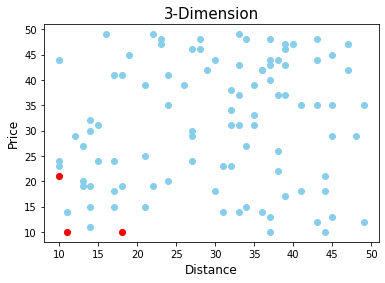

[[18 10]
 [11 10]
 [10 21]]


In [108]:
domination = SkylineBasic(M, 2)
domination = np.array(domination)
M=np.array(M)
plt.scatter(M[:,0], M[:,1],color='skyblue')
plt.scatter(domination[:,0], domination[:,1], color='r')
plt.title("3-Dimension",fontsize=15)
plt.xlabel('Distance',fontsize=12)
plt.ylabel('Price',fontsize=12)
#plt.savefig('/content/drive/My Drive/skyline operator/3-d',dpi=300,transparent=True) 
plt.show()
print(domination)

In [94]:
a=[np.array([14, 12])]
s=[[45,3]]
a+s

[array([14, 12]), [45, 3]]

In [22]:
M = np.random.randint(10,50,size=(4, 3))
for i in range(len(M)):
  M[i]=np.round(M[i],1)
plt.scatter(M[:, 0], M[:, 1],M[:,2])
plt.show()

M

IndexError: ignored

input data M=
[[33 44 19]
 [19 44 38]
 [22 40 15]
 [19 13 17]]
파티션에 dimension넣으니까  2 째 방으로 나눈다
M [[33 44 19]
 [19 44 38]
 [22 40 15]
 [19 13 17]]

M[:,dimension-1] [19 38 15 17]
P1 [[22 40 15]
 [19 13 17]]
P2 [[33 44 19]
 [19 44 38]]
p1,p2 나눈거 출력 해봤고.
input data M=
[[22 40 15]
 [19 13 17]]
파티션에 dimension넣으니까  2 째 방으로 나눈다
M [[22 40 15]
 [19 13 17]]

M[:,dimension-1] [15 17]
P1 [[22 40 15]]
P2 [[19 13 17]]
p1,p2 나눈거 출력 해봤고.
input data M=
[[22 40 15]]
input data M=
[[19 13 17]]
s1 [[22 40 15]]
s2 [[19 13 17]]
MergeBasic(s1,s2)
*******************MergeBasic: 시작*******************
s1 [[22 40 15]]
s2 [[19 13 17]]
if 1
dominate function
3
dominate True
dominate function
3
if 1: s1={p}일떄 [array([22, 40, 15]), array([19, 13, 17])]
R [array([22, 40, 15]), array([19, 13, 17])]
*******************MergeBasic: 끝*******************
결과 R= [array([22, 40, 15]), array([19, 13, 17])]

MergeBasic 완전 끝
extend 전에
s1 [[22 40 15]]
R [array([22, 40, 15]), array([19, 13, 17])]
cost_time 0.007225990295410156
inp

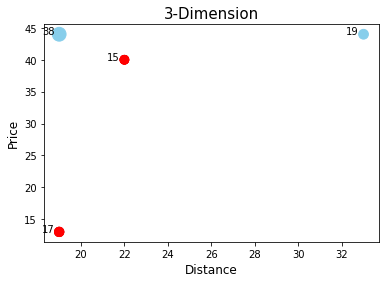

[[22 40 15]
 [22 40 15]
 [19 13 17]
 [19 13 17]
 [19 13 17]
 [22 40 15]
 [22 40 15]]


In [21]:
domination = SkylineBasic(M, 3)
domination = np.array(domination)
M=np.array(M)
plt.scatter(M[:,0], M[:,1],s=M[:,2]*5 ,color='skyblue')
plt.scatter(domination[:,0], domination[:,1],s=domination[:,2]*5, color='r')
x=M[:,0]
y=M[:,1]
for i in range(len(x)):
  plt.text(x[i]-0.8,y[i] ,"{}".format(M[:,2][i]), fontsize=10)
plt.title("3-Dimension",fontsize=15)
plt.xlabel('Distance',fontsize=12)
plt.ylabel('Price',fontsize=12)
#plt.savefig('/content/drive/My Drive/skyline operator/3-d',dpi=300,transparent=True) 
plt.show()
print(domination)

In [ ]:

M=np.array([[28,29,31],[43, 39, 47],[31, 24, 15],[18, 29, 22],[22, 18, 14],[40, 11, 27],[10, 13, 46]])